# Disciplina: Tópicos em Inteligência Computacional
Instituto Federal do Norte de Minas Gerais Campus Montes Claros <br/>
Curso: Ciência da Computação <br/>
Professora: Luciana Balieiro Cosme<br/>
Equipe: Marianna Leandra, Nayara Thaiza e Samuel Soares <br/>
**Trabalho Intermediário: Exploração da base de dados do IMDB** <br/>
Base de dados: https://datasets.imdbws.com/ <br/>
Ultima atualização da base usada: 20/11/2018 <br/>
**Objetivo: Analisar os filmes do IMDB com mais avalaiações quanto ao gênero preferido** <br/>


**Base 1: Títulos** <br/>
tconst: id do título <br/>
titleType:o tipo / formato do título (por exemplo, filme, short, tvseries, tvepisode, video, etc) <br/>
primaryTitle - o título mais popular / o título usado pelos cineastas em materiais promocionais no momento do lançamento <br/>
originalTitle - título original, no idioma original <br/>
isAdult (booleano) - 0: título não adulto; 1: título adulto <br/>
startYear (YYYY) - representa o ano de lançamento de um título. No caso da série de TV, é o ano de início da série <br/>
endYear (YYYY) - ano final da série de TV. "\ N" para todos os outros tipos de título <br/>
runtimeMinutes - tempo de execução principal do título, em minutos <br/>
genres - inclui até três gêneros associados ao título <br/>

In [1]:
import pandas
import matplotlib.pyplot as plt
#importando base 1
imdbTitulos = pandas.read_csv("titleBasics.tsv", sep='\t',dtype= { "tconst": str,
                                                                'titleType': str,
                                                                'primaryTitle': str,
                                                                'originalTitle': str,
                                                                'isAdult': str,
                                                                'startYear': str,
                                                                'endYear': str,
                                                                'runtimeMinutes': str,
                                                                'genres': str})
imdbTitulos.shape

(5419681, 9)

**Base 2: Notas dos Títulos** <br/>
averageRating - média ponderada de todas as classificações individuais de usuários <br/>
numVotes - número de votos que o título recebeu <br/>

In [2]:
#importando base 2
imdbNotas=pandas.read_csv("titleRatings.tsv", sep='\t',dtype={
    "tconst": str, 
    'averageRating': str,
    'numVotes': str})


imdbNotas.shape

(887588, 3)

In [3]:
imdbTitulos.columns[0:9]

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

In [4]:
imdbNotas.columns[0:3]

Index(['tconst', 'averageRating', 'numVotes'], dtype='object')

In [5]:
tabela = pandas.DataFrame(imdbTitulos, columns=['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'])
tabela.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Employees Leaving the Lumière Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [6]:
#seleciona os filmes

tabela=tabela.loc[(tabela['titleType'].notnull())]
filmes = tabela[tabela['titleType']=='movie']
filmes.describe()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
count,503265,503265,503265,503265,503265,503265,503265,503265,503265
unique,503265,1,440887,449051,2,132,2,462,1408
top,tt0009155,movie,Home,\N,0,\N,\N,\N,Drama
freq,1,503265,47,48,494757,48336,503264,188132,86446


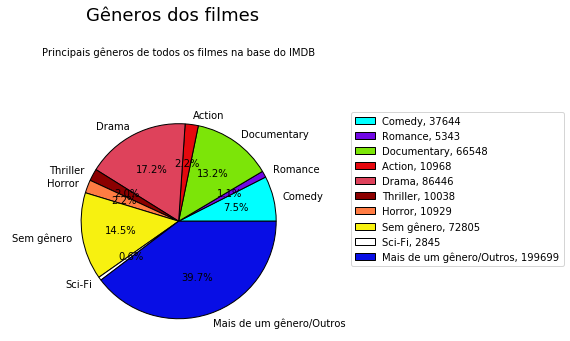

In [7]:
#sudo pip install plotly
import matplotlib.pyplot as plt

colors = ['#00ffff', '#7108e5', '#7ce508', '#e5080e', '#de425b','#8B0000', '#ff7c43','#f7f110', '#ffffff', '#080ee5']

g1 = len(filmes[filmes['genres'] == 'Comedy'])
g2 = len(filmes[filmes['genres'] == 'Romance'])
g3 = len(filmes[filmes['genres'] == 'Documentary'])
g4 = len(filmes[filmes['genres'] == 'Action'])
g5 = len(filmes[filmes['genres'] == 'Sci-Fi'])
g6 = len(filmes[filmes['genres'] == 'Drama'])
g7 = len(filmes[filmes['genres'] == 'Thriller'])
g8 = len(filmes[filmes['genres'] == 'Horror'])

g9 = len(filmes[filmes['genres'] == '\\N'])

total = g1+g2+g3+g4+g5+g6+g7+g8
total2 = 503265  - (total + g9) 

labels = [ 'Comedy', 'Romance', 'Documentary','Action', 'Drama', 
          'Thriller', 'Horror',  'Sem gênero', 'Sci-Fi',
         'Mais de um gênero/Outros']
values = [g1,g2,g3,g4,g6,g7,  g8,g9,g5, total2]


plt.pie(values, labels = labels, autopct='%1.1f%%', radius=1800, colors = colors,
        wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'black'})
plt.legend( bbox_to_anchor=(1.0,1.025), loc="upper left",  labels=['%s, %d' % (l, s) for l, s in zip(labels, values)] )
plt.axis('equal')
plt.suptitle('Gêneros dos filmes', y=1.25, fontsize=18)
plt.title('Principais gêneros de todos os filmes na base do IMDB',y=1.24, fontsize=10)


plt.show()


In [8]:
#manipulando as notas
notas = pandas.DataFrame(imdbNotas, columns=['tconst', 'averageRating', 'numVotes'])
notas.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.8,1437
1,tt0000002,6.3,171
2,tt0000003,6.6,1037
3,tt0000004,6.4,102
4,tt0000005,6.2,1734
5,tt0000006,5.5,91
6,tt0000007,5.5,579
7,tt0000008,5.6,1539
8,tt0000009,5.5,73
9,tt0000010,6.9,5125


In [9]:
notas.describe()

,tconst,averageRating,numVotes
count,887588,887588,887588
unique,887588,91,16519
top,tt0576426,7.2,6
freq,1,32754,66600


In [10]:
#convertendo de texto para numeros
notas['averageRating'] = pandas.to_numeric(notas['averageRating'])
notas['numVotes'] = pandas.to_numeric(notas['numVotes'])

notas.describe()


,averageRating,numVotes
count,887588.000000,8.875880e+05
mean,6.921884,9.690581e+02
std,1.398866,1.539330e+04
min,1.000000,5.000000e+00
25%,6.200000,9.000000e+00
50%,7.100000,2.000000e+01
75%,7.900000,7.700000e+01
max,10.000000,2.017298e+06


In [11]:
print('Maior nota: %s' % notas['averageRating'].max())
print('Maior quantidade de votos: %s' % notas['numVotes'].max())
tituloMaisVotado =  notas[notas['numVotes'] == 2017298]['tconst']
print('ID do título com mais votos:', tituloMaisVotado)
#filmeMaiorNota = notas[notas['averageRating'] == 10.0]['tconst']
#print('Filme maior nota', filmeMaiorNota)

Maior nota: 10.0
Maior quantidade de votos: 2017298
ID do título com mais votos: 79662    tt0111161
Name: tconst, dtype: object


In [12]:
#Filme com mais votos (se o título com mais votos for filme)
print('Nome do filme com mais votos:')
filmes[filmes['tconst'] == 'tt0111161']['primaryTitle']

Nome do filme com mais votos:


108783    The Shawshank Redemption
Name: primaryTitle, dtype: object

In [13]:
#titulos com mais de 500 mil votos
titulosFiltro = notas[notas['numVotes'] > 500000],['tconst','averageRating']
titulosFiltro
#titulosFiltro[0]['tconst']


(           tconst  averageRating  numVotes
 28282   tt0050083            8.9    565750
 31761   tt0054215            8.5    514749
 36880   tt0060196            8.9    597834
 38876   tt0062622            8.3    520951
 42510   tt0066921            8.3    664429
 44020   tt0068646            9.2   1382225
 46507   tt0071562            9.0    957198
 48125   tt0073486            8.7    801189
 49655   tt0075314            8.3    612700
 50860   tt0076759            8.6   1083025
 52563   tt0078748            8.5    687916
 52599   tt0078788            8.5    528787
 54204   tt0080684            8.8   1012833
 54884   tt0081505            8.4    747508
 56137   tt0082971            8.5    780830
 56721   tt0083658            8.2    605398
 58822   tt0086190            8.3    831196
 58878   tt0086250            8.3    640212
 60544   tt0088247            8.0    705284
 60979   tt0088763            8.5    893804
 62570   tt0090605            8.4    581478
 64637   tt0093058            8.

In [14]:
#coluna = [i[0:10] for i in titulosFiltro] 
#print(coluna)
print('Quantidade de títulos com mais de 500 mil votos: ', len(titulosFiltro[0]))


Quantidade de títulos com mais de 500 mil votos:  184


In [15]:
#pegando só os ids dos títulos
coluna = titulosFiltro[0]['tconst']
len(coluna)

184

In [16]:
#motrando como visualizar somente os ids dos filmes
filmes['tconst']

8          tt0000009
145        tt0000147
332        tt0000335
499        tt0000502
571        tt0000574
611        tt0000615
626        tt0000630
669        tt0000675
670        tt0000676
673        tt0000679
730        tt0000739
784        tt0000793
803        tt0000812
805        tt0000814
829        tt0000838
833        tt0000842
837        tt0000846
841        tt0000850
850        tt0000859
853        tt0000862
858        tt0000867
859        tt0000868
860        tt0000869
870        tt0000879
877        tt0000886
882        tt0000891
931        tt0000941
937        tt0000947
949        tt0000959
973        tt0000984
             ...    
5418911    tt9307994
5418914    tt9308002
5418924    tt9308022
5418927    tt9308028
5418937    tt9308048
5418958    tt9308090
5418983    tt9308150
5418995    tt9308184
5418997    tt9308190
5419000    tt9308198
5419025    tt9308256
5419064    tt9308340
5419085    tt9308382
5419089    tt9308390
5419097    tt9308406
5419099    tt9308410
5419118    tt

In [17]:
#motrando como visualizar somente os ids dos titulos (não necessariamente só filmes) com mais de 500 mil votos
coluna

28282     tt0050083
31761     tt0054215
36880     tt0060196
38876     tt0062622
42510     tt0066921
44020     tt0068646
46507     tt0071562
48125     tt0073486
49655     tt0075314
50860     tt0076759
52563     tt0078748
52599     tt0078788
54204     tt0080684
54884     tt0081505
56137     tt0082971
56721     tt0083658
58822     tt0086190
58878     tt0086250
60544     tt0088247
60979     tt0088763
62570     tt0090605
64637     tt0093058
66312     tt0095016
68476     tt0097576
70279     tt0099685
72953     tt0102926
73063     tt0103064
74832     tt0105236
76326     tt0107048
76524     tt0107290
            ...    
493697    tt1454468
497240    tt1475582
501891    tt1504320
504794    tt1520211
523440    tt1631867
524427    tt1637725
528474    tt1663202
529783    tt1670345
530694    tt1675434
556705    tt1843866
558269    tt1853728
561866    tt1877832
569304    tt1951264
572704    tt1981115
577060    tt2015381
577944    tt2024544
584975    tt2084970
586901    tt2096673
607330    tt2267998


In [18]:
#pegando somente um valor
coluna[0:1]

28282    tt0050083
Name: tconst, dtype: object

In [19]:
#como acessar uma posição da lista
filmes.loc[8]

tconst             tt0000009
titleType              movie
primaryTitle      Miss Jerry
originalTitle     Miss Jerry
isAdult                    0
startYear               1894
endYear                   \N
runtimeMinutes            45
genres               Romance
Name: 8, dtype: object

In [20]:
filmes.loc[8, 'tconst']

'tt0000009'

In [21]:
#encontra todos os matches entre as duas listas (interseção)
#vai filtrar os filmes dentre todos os títulos com mais de 500 mil votos
idFilmes = set(coluna) & set(filmes['tconst'])
#idFilmes
print('Quantidade de matches: ', len(idFilmes))

Quantidade de matches:  175


In [22]:
#Convertendo set em lista
idFilmesList = list(idFilmes)
len(idFilmesList)

175

In [23]:
idFilmesList[0]


'tt0120338'

In [24]:
#idFilmesList são os ids de todos os filmes que possuem mais de 500 mil votos
#listando todos os nomes dos filmes filtrados e suas notas
i = 0
while i < len(idFilmesList):
    nome = filmes[filmes['tconst'] == idFilmesList[i]]['primaryTitle']
    nota = notas[notas['tconst'] == idFilmesList[i]]['averageRating']
    genres = filmes[filmes['tconst'] == idFilmesList[i]]['genres']
    print('Nome do filme: ', nome.values)
    print('Nota: ', nota.values)
    i = i+1

Nome do filme:  ['Titanic']
Nota:  [7.8]
Nome do filme:  ['Fight Club']
Nota:  [8.8]
Nome do filme:  ['Jurassic World']
Nota:  [7.]
Nome do filme:  ['Avengers: Infinity War']
Nota:  [8.5]
Nome do filme:  ['Inglourious Basterds']
Nota:  [8.3]
Nome do filme:  ["One Flew Over the Cuckoo's Nest"]
Nota:  [8.7]
Nome do filme:  ['Iron Man 2']
Nota:  [7.]
Nome do filme:  ['Captain America: Civil War']
Nota:  [7.8]
Nome do filme:  ['Thor']
Nota:  [7.]
Nome do filme:  ['Psycho']
Nota:  [8.5]
Nome do filme:  ['Catch Me If You Can']
Nota:  [8.1]
Nome do filme:  ['Raiders of the Lost Ark']
Nota:  [8.5]
Nome do filme:  ['Trainspotting']
Nota:  [8.2]
Nome do filme:  ['The Usual Suspects']
Nota:  [8.6]
Nome do filme:  ['Ted']
Nota:  [6.9]
Nome do filme:  ['Kill Bill: Vol. 1']
Nota:  [8.1]
Nome do filme:  ['The Imitation Game']
Nota:  [8.]
Nome do filme:  ["Harry Potter and the Sorcerer's Stone"]
Nota:  [7.6]
Nome do filme:  ['The Shawshank Redemption']
Nota:  [9.3]
Nome do filme:  ['WALL·E']
Nota:  [8

Nome do filme:  ['Man of Steel']
Nota:  [7.1]
Nome do filme:  ['Jurassic Park']
Nota:  [8.1]
Nome do filme:  ['Interstellar']
Nota:  [8.6]
Nome do filme:  ['Star Wars: Episode IV - A New Hope']
Nota:  [8.6]
Nome do filme:  ['Full Metal Jacket']
Nota:  [8.3]
Nome do filme:  ['Blade Runner']
Nota:  [8.2]
Nome do filme:  ['Slumdog Millionaire']
Nota:  [8.]
Nome do filme:  ['Star Wars: Episode VI - Return of the Jedi']
Nota:  [8.3]
Nome do filme:  ['Casino Royale']
Nota:  [8.]
Nome do filme:  ['Indiana Jones and the Last Crusade']
Nota:  [8.3]
Nome do filme:  ['12 Angry Men']
Nota:  [8.9]
Nome do filme:  ['The Hobbit: An Unexpected Journey']
Nota:  [7.9]
Nome do filme:  ['Spider-Man']
Nota:  [7.3]


In [25]:
#refinando a busca
print('Filmes que possuem mais de 500 mil votos e nota acima de 9:\n')
i = 0
filtro2 = ''
while i < len(idFilmesList):
    notasAcimaNove = notas[notas['averageRating'] > 9]['tconst']
    filtro2 = notasAcimaNove[notas['tconst'] == idFilmesList[i]]
    j = 0
    if filtro2.size > 0:
        #print(filtro2.values)
        nome = filmes[filmes['tconst'] == filtro2.values[j]]['primaryTitle']
        generos = filmes[filmes['tconst'] == filtro2.values[j]]['genres']
        ano = filmes[filmes['tconst'] == filtro2.values[j]]['startYear']
        nota = notas[notas['tconst'] == filtro2.values[j]]['averageRating']
        qtdVotos = notas[notas['tconst'] == filtro2.values[j]]['numVotes']
        print('Nome do filme: ', nome.values)
        print('Ano: ', ano.values)
        print('Gênero(s): ', generos.values)
        print('Nota: ', nota.values)
        print('Quantidade de votos: ', qtdVotos.values)
        print('\n')
        j = j + 1
    i = i+1
    


Filmes que possuem mais de 500 mil votos e nota acima de 9:

Nome do filme:  ['The Shawshank Redemption']
Ano:  ['1994']
Gênero(s):  ['Drama']
Nota:  [9.3]
Quantidade de votos:  [2017298]


Nome do filme:  ['The Godfather']
Ano:  ['1972']
Gênero(s):  ['Crime,Drama']
Nota:  [9.2]
Quantidade de votos:  [1382225]




In [26]:
#Todos os filmes tem no máximo 3 generos e existem 19 generos distintos na amostra de 175 filmes
i = 0
act = 0
adv = 0
ani = 0
bio = 0
cri = 0
com = 0
dra = 0
fam = 0
fan = 0
his = 0
hor = 0
mys = 0
mus = 0
rom = 0
sci = 0
spo = 0
thr = 0
war = 0
wes = 0
while i < len(idFilmesList):
    generos = filmes[filmes['tconst'] == idFilmesList[i]]['genres'].apply(lambda x: x.split(','))
    
    #print(len(generos.values[0]))
    col1 = generos.values[0][0]
    #col2 = generos.values[0][1]
    #col3 = generos.values[0][2]
    if col1 == 'Action' :
        act = act+1
    elif col1 == 'Adventure':
        adv = adv+1
    elif col1 == 'Animation':
        ani = ani+1
    elif col1 == 'Biography':
        bio = bio+1
    elif col1 == 'Crime':
        cri = cri+1
    elif col1 == 'Comedy':
        com = com+1
    elif col1 == 'Drama':
        dra = dra+1
    elif col1 == 'Family':
        fam = fam+1
    elif col1 == 'Fantasy':
        fan = fan+1
    elif col1 == 'History':
        his = his+1
    elif col1 == 'Horror':
        hor = hor+1
    elif col1 == 'Mystery':
        mys = mys+1
    elif col1 == 'Music':
        mus = mus+1
    elif col1 == 'Romance':
        rom = rom+1
    elif col1 == 'Sci-Fi':
        sci = sci+1
    elif col1 == 'Sport':
        spo = spo+1
    elif col1 == 'Thriller':
        thr = thr+1
    elif col1 == 'War':
        war = war+1
    elif col1 == 'Western':
        wes = wes+1
        
    if len(generos.values[0]) == 2:
        col2 = generos.values[0][1]
        if col2 == 'Action' :
            act = act+1
        elif col2 == 'Adventure':
            adv = adv+1
        elif col2 == 'Animation':
            ani = ani+1
        elif col2 == 'Biography':
            bio = bio+1
        elif col2 == 'Crime':
            cri = cri+1
        elif col2 == 'Comedy':
            com = com+1
        elif col2 == 'Drama':
            dra = dra+1
        elif col2 == 'Family':
            fam = fam+1
        elif col2 == 'Fantasy':
            fan = fan+1
        elif col2 == 'History':
            his = his+1
        elif col2 == 'Horror':
            hor = hor+1
        elif col2 == 'Mystery':
            mys = mys+1
        elif col2 == 'Music':
            mus = mus+1
        elif col2 == 'Romance':
            rom = rom+1
        elif col2 == 'Sci-Fi':
            sci = sci+1
        elif col2 == 'Sport':
            spo = spo+1
        elif col2 == 'Thriller':
            thr = thr+1
        elif col2 == 'War':
            war = war+1
        elif col2 == 'Western':
            wes = wes+1
        
    if len(generos.values[0]) == 3:
        col3 = generos.values[0][2]
        if col3 == 'Action' :
            act = act+1
        elif col3 == 'Adventure':
            adv = adv+1
        elif col3 == 'Animation':
            ani = ani+1
        elif col3 == 'Biography':
            bio = bio+1
        elif col3 == 'Crime':
            cri = cri+1
        elif col3 == 'Comedy':
            com = com+1
        elif col3 == 'Drama':
            dra = dra+1
        elif col3 == 'Family':
            fam = fam+1
        elif col3 == 'Fantasy':
            fan = fan+1
        elif col3 == 'History':
            his = his+1
        elif col3 == 'Horror':
            hor = hor+1
        elif col3 == 'Mystery':
            mys = mys+1
        elif col3 == 'Music':
            mus = mus+1
        elif col3 == 'Romance':
            rom = rom+1
        elif col3 == 'Sci-Fi':
            sci = sci+1
        elif col3 == 'Sport':
            spo = spo+1
        elif col3 == 'Thriller':
            thr = thr+1
        elif col3 == 'War':
            war = war+1
        elif col3 == 'Western':
            wes = wes+1
    i = i+1
    
#teste1 
print(act + adv +ani +bio +cri + com +dra+ fam + fan + his+hor + mys+ mus +rom +sci + spo +thr+ war + wes)



341


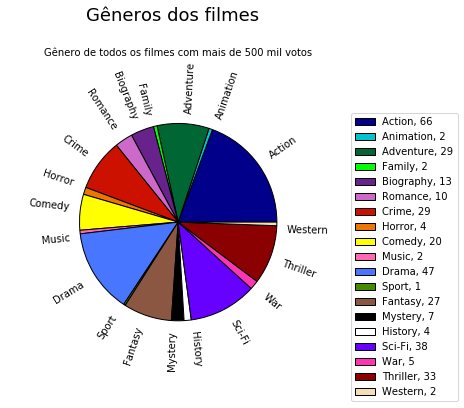

In [27]:
colors = ['#00008B', '#00C5CD', '#006633', '#00FF00','#68228B','#CD69C9','#CC1100','#EE7600','yellow', '#FF69B4', '#4876FF',
          '#458B00','#8B5742','black','white','#6600FF', '#FF34B3','#8B0000','#F5DEB3' ]
labels = ['Action', 'Animation', 'Adventure', 'Family', 'Biography', 'Romance', 'Crime', 'Horror', 'Comedy', 'Music', 'Drama',
          'Sport', 'Fantasy', 'Mystery', 'History', 'Sci-Fi', 'War', 'Thriller',  'Western']

values = [act, ani, adv, fam, bio, rom, cri, hor, com, mus, dra, spo, fan, mys, his, sci, war, thr,  wes]


plt.pie(values, labels = labels, radius=1800, rotatelabels=True, colors=colors,
       wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'black'})


plt.legend( bbox_to_anchor=(1.0,1.025), loc="upper left",  labels=['%s, %d' % (l, s) for l, s in zip(labels, values)] )
plt.axis('equal')
plt.suptitle('Gêneros dos filmes', y=1.25, fontsize=18)
plt.title('Gênero de todos os filmes com mais de 500 mil votos',y=1.24, fontsize=10)



plt.show()


**Conclusão final** <br/>
Dentre 5419681 títulos, 503265 são filmes, totalizando aproximadamente 9% da base. <br/>
Do total de filmes, somente 175 possuem mais de 500 mil votos, totalizando menos de 0,5%. <br/>
Destes 175, somente 2 filmes possuem nota acima de 9, The Godfather (1972), conhecido no Brasil como O poderoso chefão e The Shawshank Redemption (1994), entitulado com Um sonho de liberdade em português, com notas 9.2(1382225 votos) e 9.3(2017298 votos), respectivamente. Ambos os filmes possuiam Drama como gênero (The godfather também tem como gênero Crime). <br/>
Em análise final, é possível perceber (graficamente) que os gêneros que prevaleceram nas avalições foram: Ação e Drama, seguidos de Sci-Fi, Thriller, Adventure, Crime e Fantasy.



